In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [3]:
Wenshan = df['SiteName'].isin(['文山']) #找文山測站
df[Wenshan]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460261,461556,文山,臺中市,34.0,細懸浮微粒,良好,0.9,0.4,NaN,17,...,32.0,11.0,14.7,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460353,461648,文山,臺中市,30.0,細懸浮微粒,良好,0.7,0.4,NaN,15,...,32.0,9.0,11.9,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460437,461732,文山,臺中市,28.0,懸浮微粒,良好,0.5,0.4,NaN,14,...,30.0,7.0,7.8,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460462,461757,文山,臺中市,26.0,懸浮微粒,良好,0.8,0.4,NaN,13,...,28.0,7.0,7.4,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460548,461843,文山,臺中市,24.0,懸浮微粒,良好,0.0,0.3,NaN,14,...,26.0,6.0,6.7,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460708,462003,文山,臺中市,23.0,懸浮微粒,良好,0.9,0.3,NaN,14,...,25.0,5.0,7.8,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460799,462094,文山,臺中市,23.0,懸浮微粒,良好,0.8,0.3,NaN,16,...,25.0,6.0,7.1,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461122,462417,文山,臺中市,30.0,懸浮微粒,良好,0.8,0.3,NaN,23,...,32.0,8.0,10.8,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461207,462502,文山,臺中市,33.0,懸浮微粒,良好,0.7,0.3,NaN,25,...,36.0,8.0,10.5,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461299,462594,文山,臺中市,35.0,懸浮微粒,良好,0.8,0.3,NaN,27,...,38.0,7.0,10.2,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [4]:
Wenshan = df['SiteName'].isin(['文山']) #找文山測站
Wenshan=df[Wenshan].fillna(method='ffill').drop(columns=['SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column


Wenshan

,SO2,CO,O3,PM10,PM25,NO2
0,0.9,0.4,17,32.0,11.0,14.7
1,0.7,0.4,15,32.0,9.0,11.9
2,0.5,0.4,14,30.0,7.0,7.8
3,0.8,0.4,13,28.0,7.0,7.4
4,0.0,0.3,14,26.0,6.0,6.7
5,0.9,0.3,14,25.0,5.0,7.8
6,0.8,0.3,16,25.0,6.0,7.1
7,0.8,0.3,23,32.0,8.0,10.8
8,0.7,0.3,25,36.0,8.0,10.5
9,0.8,0.3,27,38.0,7.0,10.2


In [5]:
cd4 = Wenshan['PM25'].isin([0])
Wenshan[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2
16,0.0,0,0,0.0,0.0,0.0
68,0.0,0,0,0.0,0.0,0.0
476,0.0,0,0,0.0,0.0,0.0
572,0.0,0,0,0.0,0.0,0.0
783,0.0,0,0,0.0,0.0,0.0
896,1.0,0.38,7,36.0,0.0,9.8
897,1.2,0.35,8,36.0,0.0,0.0
898,1.5,0.32,9,34.0,0.0,15.1
899,1.8,0.3,10,32.0,0.0,14.1
900,0.0,0.29,11,29.0,0.0,0.0


In [6]:
Wenshan.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值

Wenshan

,SO2,CO,O3,PM10,PM25,NO2
0,0.9,0.40,17.0,32.0,11.0,14.7
1,0.7,0.40,15.0,32.0,9.0,11.9
2,0.5,0.40,14.0,30.0,7.0,7.8
3,0.8,0.40,13.0,28.0,7.0,7.4
4,NaN,0.30,14.0,26.0,6.0,6.7
5,0.9,0.30,14.0,25.0,5.0,7.8
6,0.8,0.30,16.0,25.0,6.0,7.1
7,0.8,0.30,23.0,32.0,8.0,10.8
8,0.7,0.30,25.0,36.0,8.0,10.5
9,0.8,0.30,27.0,38.0,7.0,10.2


In [7]:
Wenshan.fillna(method='ffill', inplace=True) #以前面數字來取代0值


Wenshan

,SO2,CO,O3,PM10,PM25,NO2
0,0.9,0.40,17.0,32.0,11.0,14.7
1,0.7,0.40,15.0,32.0,9.0,11.9
2,0.5,0.40,14.0,30.0,7.0,7.8
3,0.8,0.40,13.0,28.0,7.0,7.4
4,0.8,0.30,14.0,26.0,6.0,6.7
5,0.9,0.30,14.0,25.0,5.0,7.8
6,0.8,0.30,16.0,25.0,6.0,7.1
7,0.8,0.30,23.0,32.0,8.0,10.8
8,0.7,0.30,25.0,36.0,8.0,10.5
9,0.8,0.30,27.0,38.0,7.0,10.2


In [8]:
cd4 = Wenshan['PM25'].isin([0])
Wenshan[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2


In [9]:
Wenshan['pr']=''
Wenshan.drop([ 0,1],inplace=True)
Wenshan.reset_index(drop=True,inplace=True)


Wenshan.to_csv('Wenshanpollution.csv')

Wenshan

,SO2,CO,O3,PM10,PM25,NO2,pr
0,0.5,0.40,14.0,30.0,7.0,7.8,
1,0.8,0.40,13.0,28.0,7.0,7.4,
2,0.8,0.30,14.0,26.0,6.0,6.7,
3,0.9,0.30,14.0,25.0,5.0,7.8,
4,0.8,0.30,16.0,25.0,6.0,7.1,
5,0.8,0.30,23.0,32.0,8.0,10.8,
6,0.7,0.30,25.0,36.0,8.0,10.5,
7,0.8,0.30,27.0,38.0,7.0,10.2,
8,0.9,0.30,28.0,41.0,7.0,8.5,
9,1.1,0.40,30.0,46.0,8.0,9.6,


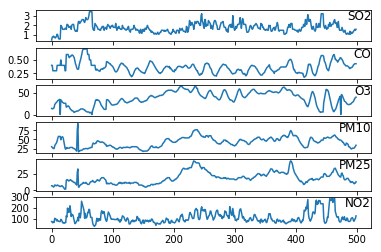

In [10]:
# load dataset
dataset =pd.read_csv('Wenshanpollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4,5]
i=1
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:500, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [11]:
dataset

,SO2,CO,O3,PM10,PM25,NO2,pr
0,0.5,0.40,14.0,30.0,7.0,74.0,NaN
1,0.8,0.40,13.0,28.0,7.0,70.0,NaN
2,0.8,0.30,14.0,26.0,6.0,63.0,NaN
3,0.9,0.30,14.0,25.0,5.0,74.0,NaN
4,0.8,0.30,16.0,25.0,6.0,67.0,NaN
5,0.8,0.30,23.0,32.0,8.0,104.0,NaN
6,0.7,0.30,25.0,36.0,8.0,101.0,NaN
7,0.8,0.30,27.0,38.0,7.0,98.0,NaN
8,0.9,0.30,28.0,41.0,7.0,81.0,NaN
9,1.1,0.40,30.0,46.0,8.0,92.0,NaN


In [12]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,O3,PM10,PM25,NO2,pr
0,-1.164255,-0.070214,-0.910403,-0.839722,-1.161974,-0.741931,7.0
1,-0.956034,-0.070214,-0.979573,-0.931003,-1.161974,-0.799293,7.0
2,-0.956034,-0.194638,-0.910403,-1.022284,-1.231071,-0.899676,6.0
3,-0.886627,-0.194638,-0.910403,-1.067924,-1.300168,-0.741931,5.0
4,-0.956034,-0.194638,-0.772062,-1.067924,-1.231071,-0.842314,6.0
5,-0.956034,-0.194638,-0.287870,-0.748442,-1.092876,-0.311715,8.0
6,-1.025441,-0.194638,-0.149529,-0.565880,-1.092876,-0.354736,8.0
7,-0.956034,-0.194638,-0.011188,-0.474600,-1.161974,-0.397758,7.0
8,-0.886627,-0.194638,0.057982,-0.337679,-1.161974,-0.641547,7.0
9,-0.747813,-0.070214,0.196323,-0.109477,-1.092876,-0.483801,8.0


In [13]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 




In [14]:
'''
#將次序打亂 資料亂序 將資料打散，而非照日期排序
def shuffle(X,Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]
'''

'\n#將次序打亂 資料亂序 將資料打散，而非照日期排序\ndef shuffle(X,Y):\n    np.random.seed(10)\n    randomList = np.arange(X.shape[0])\n    np.random.shuffle(randomList)\n    return X[randomList], Y[randomList]\n'

In [15]:
#Training data & Validation data
#將Training Data取一部份當作Validation Data
def splitData(X,Y,rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [16]:
#合併輸出

# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

# shuffle the data, and random seed is 10
#X_train, Y_train = shuffle(X_train, Y_train)
X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
#Y_train = Y_train[:,:,np.newaxis]
#Y_val = Y_val[:,:,np.newaxis]

In [17]:
X_train.shape

(6148, 12, 6)

Instructions for updating:
Colocations handled automatically by placer.


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 6))`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                18176     
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

Epoch 58/500
5533/5533 [==============================] - 1s 166us/step - loss: 45.0809 - val_loss: 27.5574
Epoch 59/500
5533/5533 [==============================] - 1s 163us/step - loss: 45.2658 - val_loss: 26.7336
Epoch 60/500
5533/5533 [==============================] - 1s 159us/step - loss: 44.7644 - val_loss: 26.4046
Epoch 61/500
5533/5533 [==============================] - 1s 145us/step - loss: 43.8409 - val_loss: 26.3744
Epoch 62/500
5533/5533 [==============================] - 1s 148us/step - loss: 44.7433 - val_loss: 26.3893
Epoch 63/500
5533/5533 [==============================] - 1s 162us/step - loss: 43.9142 - val_loss: 26.8866
Epoch 64/500
5533/5533 [==============================] - 1s 159us/step - loss: 44.0369 - val_loss: 26.7661
Epoch 65/500
5533/5533 [==============================] - 1s 148us/step - loss: 43.5223 - val_loss: 26.1918
Epoch 66/500
5533/5533 [==============================] - 1s 162us/step - loss: 43.0729 - val_loss: 25.8800
Epoch 67/500
5533/5533 [====

5533/5533 [==============================] - 1s 181us/step - loss: 35.5273 - val_loss: 22.6468
Epoch 134/500
5533/5533 [==============================] - 1s 185us/step - loss: 35.2367 - val_loss: 22.8689
Epoch 135/500
5533/5533 [==============================] - 1s 177us/step - loss: 35.8340 - val_loss: 23.3409
Epoch 136/500
5533/5533 [==============================] - 1s 184us/step - loss: 35.8743 - val_loss: 23.0727
Epoch 137/500
5533/5533 [==============================] - 1s 181us/step - loss: 35.8544 - val_loss: 22.6753
Epoch 138/500
5533/5533 [==============================] - 1s 188us/step - loss: 35.6456 - val_loss: 22.8643
Epoch 139/500
5533/5533 [==============================] - 1s 181us/step - loss: 35.6113 - val_loss: 23.0044
Epoch 140/500
5533/5533 [==============================] - 1s 185us/step - loss: 35.2586 - val_loss: 23.4128
Epoch 141/500
5533/5533 [==============================] - 1s 188us/step - loss: 35.7481 - val_loss: 22.2949
Epoch 142/500
5533/5533 [========

5533/5533 [==============================] - 1s 184us/step - loss: 29.0858 - val_loss: 19.9037
Epoch 209/500
5533/5533 [==============================] - 1s 167us/step - loss: 29.8144 - val_loss: 19.5520
Epoch 210/500
5533/5533 [==============================] - 1s 168us/step - loss: 28.7472 - val_loss: 19.6830
Epoch 211/500
5533/5533 [==============================] - 1s 180us/step - loss: 30.3937 - val_loss: 19.8660
Epoch 212/500
5533/5533 [==============================] - 1s 188us/step - loss: 30.2648 - val_loss: 19.7766
Epoch 213/500
5533/5533 [==============================] - 1s 176us/step - loss: 28.7574 - val_loss: 19.9035
Epoch 214/500
5533/5533 [==============================] - 1s 185us/step - loss: 30.7664 - val_loss: 20.1889
Epoch 215/500
5533/5533 [==============================] - 1s 181us/step - loss: 28.7980 - val_loss: 19.9252
Epoch 216/500
5533/5533 [==============================] - 1s 186us/step - loss: 28.1346 - val_loss: 19.1687
Epoch 217/500
5533/5533 [========

5533/5533 [==============================] - 1s 180us/step - loss: 25.7125 - val_loss: 17.6291
Epoch 284/500
5533/5533 [==============================] - 1s 193us/step - loss: 26.4790 - val_loss: 16.7348
Epoch 285/500
5533/5533 [==============================] - 1s 171us/step - loss: 25.9472 - val_loss: 17.1271
Epoch 286/500
5533/5533 [==============================] - 1s 180us/step - loss: 25.5470 - val_loss: 17.1417
Epoch 287/500
5533/5533 [==============================] - 1s 187us/step - loss: 25.0897 - val_loss: 16.8359
Epoch 288/500
5533/5533 [==============================] - 1s 188us/step - loss: 26.6368 - val_loss: 17.4960
Epoch 289/500
5533/5533 [==============================] - 1s 181us/step - loss: 27.2654 - val_loss: 17.7094
Epoch 290/500
5533/5533 [==============================] - 1s 178us/step - loss: 25.0571 - val_loss: 17.2263
Epoch 291/500
5533/5533 [==============================] - 1s 175us/step - loss: 25.9307 - val_loss: 17.1662
Epoch 292/500
5533/5533 [========

5533/5533 [==============================] - 1s 182us/step - loss: 24.4185 - val_loss: 15.1112
Epoch 359/500
5533/5533 [==============================] - 1s 174us/step - loss: 22.5318 - val_loss: 14.3499
Epoch 360/500
5533/5533 [==============================] - 1s 176us/step - loss: 23.5899 - val_loss: 14.7086
Epoch 361/500
5533/5533 [==============================] - 1s 184us/step - loss: 23.2073 - val_loss: 14.6544
Epoch 362/500
5533/5533 [==============================] - 1s 173us/step - loss: 24.0407 - val_loss: 14.8393
Epoch 363/500
5533/5533 [==============================] - 1s 178us/step - loss: 23.4385 - val_loss: 14.4418
Epoch 364/500
5533/5533 [==============================] - 1s 167us/step - loss: 22.6226 - val_loss: 14.3790
Epoch 365/500
5533/5533 [==============================] - 1s 153us/step - loss: 23.8240 - val_loss: 15.0888
Epoch 366/500
5533/5533 [==============================] - 1s 170us/step - loss: 24.1572 - val_loss: 15.1884
Epoch 367/500
5533/5533 [========

5533/5533 [==============================] - 1s 151us/step - loss: 20.7230 - val_loss: 12.2241
Epoch 434/500
5533/5533 [==============================] - 1s 148us/step - loss: 22.4504 - val_loss: 12.7735
Epoch 435/500
5533/5533 [==============================] - 1s 133us/step - loss: 21.9279 - val_loss: 13.1761
Epoch 436/500
5533/5533 [==============================] - 1s 149us/step - loss: 21.7531 - val_loss: 12.9309
Epoch 437/500
5533/5533 [==============================] - 1s 156us/step - loss: 21.0198 - val_loss: 12.9172
Epoch 438/500
5533/5533 [==============================] - 1s 148us/step - loss: 21.9103 - val_loss: 12.5622
Epoch 439/500
5533/5533 [==============================] - 1s 151us/step - loss: 21.7425 - val_loss: 13.4712
Epoch 440/500
5533/5533 [==============================] - 1s 143us/step - loss: 21.5410 - val_loss: 13.3579
Epoch 441/500
5533/5533 [==============================] - 1s 147us/step - loss: 22.5294 - val_loss: 12.4205
Epoch 442/500
5533/5533 [========

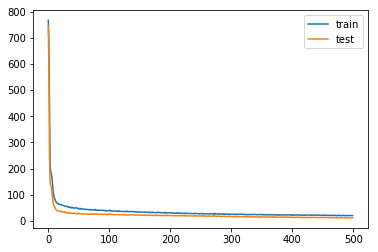

In [18]:
#測試

def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model1 = buildManyToOneModel(X_train.shape)

history=model1.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model1
model1.save('Wenshanmodel1.h5')
del model1

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(12, 6))`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                11400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 357       
Total params: 11,757
Trainable params: 11,757
Non-trainable params: 0
_________________________________________________________________
Train on 5533 samples, validate on 615 samples
Epoch 1/300
5533/5533 [==============================] - 1s 221us/step - loss: 769.0677 - val_loss: 756.1565
Epoch 2/300
5533/5533 [==============================] - 0s 69us/step - loss: 726.6153 - val_loss: 680.0226
Epoch 3/300
5533/5533 [==============================] - 0s 70us/step - loss: 613.6954 - val_loss: 540.6979
Epoch 4/300
5533/5533 [=======

5533/5533 [==============================] - 1s 98us/step - loss: 68.6481 - val_loss: 53.3447
Epoch 70/300
5533/5533 [==============================] - 1s 104us/step - loss: 68.6946 - val_loss: 52.9434
Epoch 71/300
5533/5533 [==============================] - 1s 100us/step - loss: 66.6865 - val_loss: 52.5769
Epoch 72/300
5533/5533 [==============================] - 1s 101us/step - loss: 65.6099 - val_loss: 51.4918
Epoch 73/300
5533/5533 [==============================] - 1s 102us/step - loss: 66.2541 - val_loss: 51.3421
Epoch 74/300
5533/5533 [==============================] - 1s 100us/step - loss: 67.6806 - val_loss: 50.3158
Epoch 75/300
5533/5533 [==============================] - 1s 92us/step - loss: 65.5157 - val_loss: 49.9407
Epoch 76/300
5533/5533 [==============================] - 1s 104us/step - loss: 65.4748 - val_loss: 49.7890
Epoch 77/300
5533/5533 [==============================] - 1s 97us/step - loss: 64.8379 - val_loss: 48.8568
Epoch 78/300
5533/5533 [====================

Epoch 145/300
5533/5533 [==============================] - 1s 99us/step - loss: 44.5377 - val_loss: 32.7991
Epoch 146/300
5533/5533 [==============================] - 1s 107us/step - loss: 45.0506 - val_loss: 32.4817
Epoch 147/300
5533/5533 [==============================] - 1s 99us/step - loss: 45.4944 - val_loss: 32.3412
Epoch 148/300
5533/5533 [==============================] - 1s 107us/step - loss: 43.6165 - val_loss: 31.9849
Epoch 149/300
5533/5533 [==============================] - 1s 95us/step - loss: 46.0363 - val_loss: 32.0969
Epoch 150/300
5533/5533 [==============================] - 1s 97us/step - loss: 43.4241 - val_loss: 31.8290
Epoch 151/300
5533/5533 [==============================] - 1s 107us/step - loss: 45.3280 - val_loss: 32.4603
Epoch 152/300
5533/5533 [==============================] - 1s 126us/step - loss: 45.1473 - val_loss: 31.9554
Epoch 153/300
5533/5533 [==============================] - 1s 109us/step - loss: 45.2117 - val_loss: 31.6714
Epoch 154/300
5533/5533

5533/5533 [==============================] - 1s 111us/step - loss: 37.3709 - val_loss: 25.9476
Epoch 221/300
5533/5533 [==============================] - 1s 115us/step - loss: 37.1760 - val_loss: 26.1972
Epoch 222/300
5533/5533 [==============================] - 1s 98us/step - loss: 35.6412 - val_loss: 25.8995
Epoch 223/300
5533/5533 [==============================] - 1s 96us/step - loss: 37.6841 - val_loss: 26.2983
Epoch 224/300
5533/5533 [==============================] - 1s 102us/step - loss: 37.0557 - val_loss: 25.9139
Epoch 225/300
5533/5533 [==============================] - 1s 110us/step - loss: 37.8395 - val_loss: 25.8757
Epoch 226/300
5533/5533 [==============================] - 1s 110us/step - loss: 36.9670 - val_loss: 26.2021
Epoch 227/300
5533/5533 [==============================] - 1s 113us/step - loss: 37.0422 - val_loss: 25.5123
Epoch 228/300
5533/5533 [==============================] - 1s 127us/step - loss: 35.8842 - val_loss: 25.8771
Epoch 229/300
5533/5533 [==========

5533/5533 [==============================] - 1s 246us/step - loss: 33.4781 - val_loss: 22.0750
Epoch 296/300
5533/5533 [==============================] - 1s 244us/step - loss: 32.4957 - val_loss: 21.8953
Epoch 297/300
5533/5533 [==============================] - 1s 253us/step - loss: 31.7016 - val_loss: 21.3962
Epoch 298/300
5533/5533 [==============================] - 1s 257us/step - loss: 32.5752 - val_loss: 21.9623
Epoch 299/300
5533/5533 [==============================] - 1s 265us/step - loss: 32.4591 - val_loss: 21.7054
Epoch 300/300
5533/5533 [==============================] - 1s 236us/step - loss: 32.0865 - val_loss: 21.8632


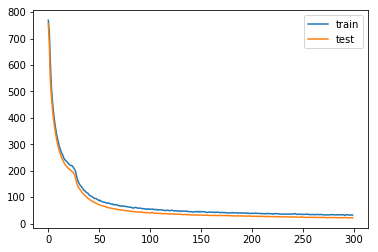

In [20]:


def buildManyToOneModel2(shape):
    model = Sequential()
    model.add(LSTM(50,input_length=shape[1], input_dim=shape[2]))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return  model

model2 = buildManyToOneModel2(X_train.shape)

#checkpoint = ModelCheckpoint(162,monitor='val_loss', save_weights_only=True,verbose=1,save_best_only=True, period=1)

earlystopping = EarlyStopping(monitor='val_loss',patience=20, verbose=1, mode='auto')

history=model2.fit(X_train, Y_train, epochs=300, batch_size=256, validation_split=0.1, callbacks=[earlystopping])

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model2
model2.save('Wenshanmodel2.h5')
del model2

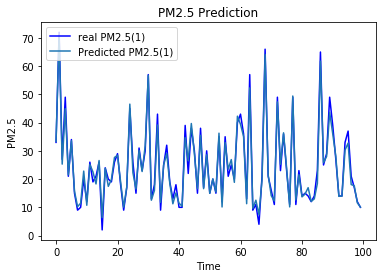

Train 0.595640858815875
Validation 0.5461200585651538
2.8726173727320997e+42
The R2 score on the Test set is:	0.935
Train Score: 3.03 RMSE
Test Score: 3.53 RMSE
The MSE   on the Test set is: 12.436636037522359
The RMSE  on the Test set is: 3.526561503436791
The MAE   on the Test set is: 2.5508902639904876
The MAPE  on the Test set is: 0.024106508310060917
The SMAPE on the Test set is: 0.019223346202586724


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [21]:
#讀取model1
model = load_model('Wenshanmodel1.h5')
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

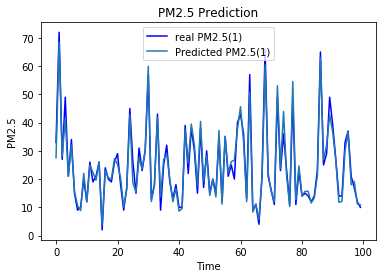

Train 0.4993493819128172
Validation 0.5124450951683748
2.872617373391086e+42
The R2 score on the Test set is:	0.892
Train Score: 4.27 RMSE
Test Score: 4.56 RMSE
The MSE   on the Test set is: 20.748145277802127
The RMSE  on the Test set is: 4.555013202813152
The MAE   on the Test set is: 3.103153003107377
The MAPE  on the Test set is: 0.024143871606767012
The SMAPE on the Test set is: 0.021451596078760685


In [22]:
#讀取model2
model = load_model('Wenshanmodel2.h5')
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

In [23]:
testPredict

array([[27.571436, 27.046682, 26.647018, ..., 25.946629, 25.608011,
        25.242836],
       [68.52055 , 67.85241 , 67.41475 , ..., 65.792534, 64.74047 ,
        63.944763],
       [28.111141, 28.449974, 28.630314, ..., 28.774097, 28.848047,
        28.85631 ],
       ...,
       [33.609154, 34.445377, 34.927795, ..., 35.53753 , 35.73178 ,
        35.64496 ],
       [48.06958 , 48.509678, 48.742527, ..., 48.46475 , 48.257362,
        47.762123],
       [42.442966, 42.12919 , 41.802208, ..., 41.006622, 40.464653,
        39.94319 ]], dtype=float32)